# Assignment - Akshit Gupta

This code base is used to train the model on the mnist dataset present in the tensorflow library and then exporting to as an .h5 file that will be further used for the inferencing pipeline.

In [1]:
# importing necessary libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# importing the dataset
mnist = tf.keras.datasets.mnist

In [3]:
# loading the dataset into train and test
(x_train, y_train),(x_test, y_test) = mnist.load_data()

## Basic EDA

In [4]:
# checking the shape of the datasets
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


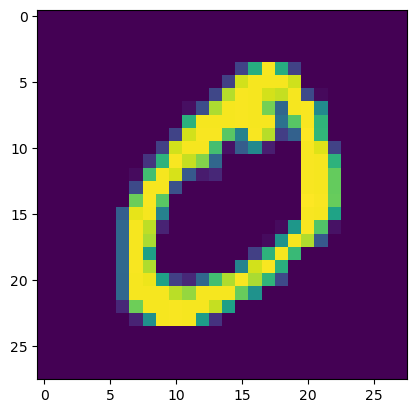

In [5]:
# checking one test image
plt.imshow (x_train[1])

In [6]:
# checking the first 5 target values
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [7]:
# Normalization of the pixel values for better results.
x_train, x_test = x_train / 255.0, x_test / 255.0

## Model Training

In [8]:
# The layers of the models are defined in an sequential manner with all the relevant activation functions.

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# upon definitions, models are compiled with the optimizers and loss functions.
model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

c:\Users\tgk2kor\.conda\envs\dl\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Training of the model for 10 epochs for good accuracy
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8577 - loss: 0.4867
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9555 - loss: 0.1510
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9661 - loss: 0.1094
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9737 - loss: 0.0865
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9770 - loss: 0.0726
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9805 - loss: 0.0615
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9812 - loss: 0.0583
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9844 - loss: 0.0494
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9846 - loss: 0.0466
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9864 - loss: 0.0419


## Model Evaluation

In [10]:
#wvaluting the model
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.9736 - loss: 0.0905


[0.07522252947092056, 0.9782000184059143]

## Validating the results

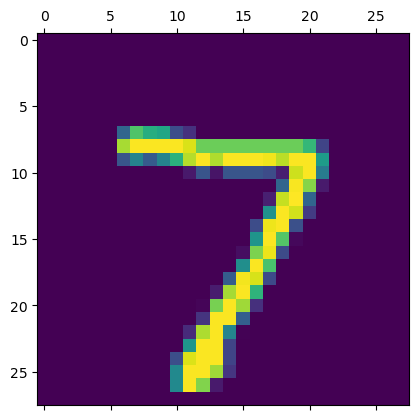

In [11]:
plt.matshow(x_test[0])

In [12]:
y_pred = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step


In [13]:
np.argmax(y_pred[0])

7

In [14]:
y_pred_labels = [np.argmax(i) for i in y_pred]

In [15]:
# creating the confusion matrix for results validation
cm = tf.math.confusion_matrix(labels=y_test, predictions = y_pred_labels)

In [16]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    1,    0,    0,    0,    1,    4,    1,    3,    1],
       [   0, 1126,    3,    1,    0,    0,    2,    0,    3,    0],
       [   1,    4, 1008,    1,    5,    0,    1,    5,    7,    0],
       [   0,    0,    4,  987,    0,    5,    0,    4,    3,    7],
       [   0,    0,    1,    0,  969,    0,    5,    1,    1,    5],
       [   2,    2,    0,    9,    2,  867,    6,    0,    3,    1],
       [   5,    2,    1,    1,    7,    3,  938,    0,    1,    0],
       [   2,    6,   11,    1,    2,    0,    0, 1001,    2,    3],
       [   4,    3,    3,    2,    5,    0,    3,    4,  944,    6],
       [   0,    3,    0,    3,   22,    2,    1,    4,    1,  973]])>

# Exporting and saving the model

In [17]:
model.save(r'C:\Users\tgk2kor\Music\Learning\cars24\model.keras')